# Machine Learning Model for Dublin Bikes application

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression ## maybe logisitic regression??????

# Clean and standardize the data

In [40]:
# we just need to create a collect csv files for both and put them in here
training_weather = pd.read_csv('dynamic_4_4_23.csv')
training_weather.head()

,number,name,bike_stands,available_bike_stands,available_bikes,status,s_date,s_time
0,42,SMITHFIELD NORTH,30,15,15,OPEN,2023-03-03,10:47:16
1,30,PARNELL SQUARE NORTH,20,19,1,OPEN,2023-03-03,10:45:35
2,54,CLONMEL STREET,33,21,12,OPEN,2023-03-03,10:49:41
3,108,AVONDALE ROAD,35,17,18,OPEN,2023-03-03,10:44:37
4,20,JAMES STREET EAST,30,12,17,OPEN,2023-03-03,10:44:23


### Drop 3rd March Data and any data after the 31st March

In [39]:
training_weather['s_date'] = pd.to_datetime(training_weather['s_date'])
drop_dates=training_weather[training_weather['s_date'] >= '2023-03-04']
drop_dates.head()

,number,name,bike_stands,available_bike_stands,available_bikes,status,s_date,s_time
18059,20,JAMES STREET EAST,30,24,6,OPEN,2023-03-04,00:00:01
18060,56,MOUNT STREET LOWER,40,31,9,OPEN,2023-03-04,00:00:34
18061,6,CHRISTCHURCH PLACE,20,20,0,OPEN,2023-03-04,00:00:25
18083,114,WILTON TERRACE (PARK),40,40,0,OPEN,2023-03-04,00:00:22
18086,113,MERRION SQUARE SOUTH,40,39,1,OPEN,2023-03-04,00:00:26


In [41]:
drop_dates = drop_dates[drop_dates['s_date'].dt.month != 4]
drop_dates.tail()

,number,name,bike_stands,available_bike_stands,available_bikes,status,s_date,s_time
935841,44,UPPER SHERRARD STREET,30,7,23,OPEN,2023-03-31,23:57:32
935842,89,FITZWILLIAM SQUARE EAST,40,32,8,OPEN,2023-03-31,23:59:04
935855,88,BLACKHALL PLACE,30,20,10,OPEN,2023-03-31,23:56:27
935904,60,NORTH CIRCULAR ROAD,30,0,30,OPEN,2023-03-31,23:59:51
935951,109,BUCKINGHAM STREET LOWER,29,16,13,OPEN,2023-03-31,23:59:49


### Test data goes from 1st-7th April

In [ ]:
##code to get the test data

#### Now seperate drop dates into training and validation data

In [44]:
training_data=drop_dates[drop_dates['s_date']<='2023-03-24']
training_data.tail()

,number,name,bike_stands,available_bike_stands,available_bikes,status,s_date,s_time
707154,85,ROTHE ABBEY,35,22,13,OPEN,2023-03-24,23:59:23
707158,89,FITZWILLIAM SQUARE EAST,40,39,1,OPEN,2023-03-24,23:57:19
707163,40,JERVIS STREET,21,4,17,OPEN,2023-03-24,23:56:56
707165,103,GRANGEGORMAN LOWER (SOUTH),40,39,1,OPEN,2023-03-24,23:58:12
707168,83,EMMET ROAD,40,31,9,OPEN,2023-03-24,23:57:58


In [45]:
validation_data=drop_dates[drop_dates['s_date']>'2023-03-24']
validation_data.head()

,number,name,bike_stands,available_bike_stands,available_bikes,status,s_date,s_time
706946,54,CLONMEL STREET,33,29,4,OPEN,2023-03-25,00:00:17
706952,32,PEARSE STREET,30,24,6,OPEN,2023-03-25,00:00:27
706960,1,CLARENDON ROW,31,20,11,OPEN,2023-03-25,00:00:30
706961,23,CUSTOM HOUSE,30,3,27,OPEN,2023-03-25,00:00:07
706964,68,HANOVER QUAY,40,31,9,OPEN,2023-03-25,00:00:06


In [ ]:
###do the same for test data

### Do the same for the corresponding weather data for each training set

### When the code is merged what columns will I keep:
- Name
- Bike_stands, available_bikes and available_bike stands
- s_date- to convert to the correct day
- s_time to convert to the nearest hour
- temperature
- wind_speed
- rain_1 
- weather_main

- Reasoning: I think time of day, extremely high/low temp, extremely high winds and heavy rainfall can predict a variance in bike use

In [118]:
## get data to work for the first 7 days 4th to 9th March
training_weather=training_data[training_data['s_date']<='2023-03-09']

In [119]:
df_weather = pd.read_csv('weather_30_3_23.csv')


### What does the following do

In [120]:
training_weather['s_time'] =training_weather['s_time'].astype(str).apply(lambda x: str(x).split(' ')[-1])
df_weather['w_time'] = df_weather['w_time'].astype(str).apply(lambda x: str(x).split(' ')[-1])
training_weather['datetime'] = pd.to_datetime(training_weather['s_date'].astype(str) + ' ' + training_weather['s_time'].astype(str).apply(lambda x: str(x).split(' ')[-1]))
df_weather['datetime'] = pd.to_datetime(df_weather['w_date'].astype(str) + ' ' + df_weather['w_time'].astype(str).apply(lambda x: str(x).split(' ')[-1]))

/tmp/ipykernel_8959/2236723038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_weather['s_time'] =training_weather['s_time'].astype(str).apply(lambda x: str(x).split(' ')[-1])
/tmp/ipykernel_8959/2236723038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_weather['datetime'] = pd.to_datetime(training_weather['s_date'].astype(str) + ' ' + training_weather['s_time'].astype(str).apply(lambda x: str(x).split(' ')[-1]))


In [121]:
training_weather = training_weather.sort_values('datetime')
df_weather = df_weather.sort_values('datetime')

df_main = pd.merge_asof(training_weather, df_weather, on='datetime', direction='nearest')
df_main.tail()

,number,name,bike_stands,available_bike_stands,available_bikes,status,s_date,s_time,datetime,latitude,...,wind_direction,rain_1,rain_3,snow_1,snow_3,clouds,sunrise,sunset,w_date,w_time
196219,96,KILMAINHAM LANE,30,28,2,OPEN,2023-03-09,23:59:42,2023-03-09 23:59:42,53.3467,...,90,2.59,NaN,0,0,75,1678344904,1678385792,2023-03-09,08:38:06
196220,96,KILMAINHAM LANE,30,28,2,OPEN,2023-03-09,23:59:42,2023-03-09 23:59:42,53.3467,...,90,2.59,NaN,0,0,75,1678344904,1678385792,2023-03-09,08:38:06
196221,99,CITY QUAY,30,29,1,OPEN,2023-03-09,23:59:49,2023-03-09 23:59:49,53.3467,...,90,2.59,NaN,0,0,75,1678344904,1678385792,2023-03-09,08:38:06
196222,99,CITY QUAY,30,29,1,OPEN,2023-03-09,23:59:49,2023-03-09 23:59:49,53.3467,...,90,2.59,NaN,0,0,75,1678344904,1678385792,2023-03-09,08:38:06
196223,64,SANDWITH STREET,40,21,19,OPEN,2023-03-09,23:59:58,2023-03-09 23:59:58,53.3467,...,90,2.59,NaN,0,0,75,1678344904,1678385792,2023-03-09,08:38:06


# Cleaning the dataframe

In [122]:
df_main.columns

Index(['number', 'name', 'bike_stands', 'available_bike_stands',
       'available_bikes', 'status', 's_date', 's_time', 'datetime', 'latitude',
       'longitude', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon', 'temperature', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'visibility', 'wind_speed', 'wind_direction',
       'rain_1', 'rain_3', 'snow_1', 'snow_3', 'clouds', 'sunrise', 'sunset',
       'w_date', 'w_time'],
      dtype='object')

In [123]:
df_main = df_main.drop(['name', 'status', 's_date', 's_time','latitude',
       'longitude', 'weather_id', 'weather_description',
       'weather_icon', 'feels_like', 'temp_min', 'temp_max',
       'pressure','humidity', 'visibility','wind_direction',
        'rain_3', 'snow_1', 'snow_3', 'clouds', 'sunrise', 'sunset',
       'w_date', 'w_time'], axis = 1)

In [124]:
df_main["availability_percentage"] = df_main["available_bikes"]/(df_main["bike_stands"])
df_main["availability_percentage"].round(2)

0         0.20
1         0.20
2         0.25
3         1.00
4         1.00
          ... 
196219    0.07
196220    0.07
196221    0.03
196222    0.03
196223    0.48
Name: availability_percentage, Length: 196224, dtype: float64

In [125]:
df_main.columns

Index(['number', 'bike_stands', 'available_bike_stands', 'available_bikes',
       'datetime', 'weather_main', 'temperature', 'wind_speed', 'rain_1',
       'availability_percentage'],
      dtype='object')

In [126]:
df_main["temperature"] = df_main["temperature"] - 275.15

In [127]:
df_main["weather_main"].unique()

array(['Clouds', 'Drizzle', 'Rain', 'Clear'], dtype=object)

In [128]:
df_main["datetime"] = pd.to_datetime(df_main["datetime"])
df_main["year"] = df_main["datetime"].dt.year
df_main["month"] = df_main["datetime"].dt.month
df_main["day"] = df_main["datetime"].dt.day
df_main["time"] = df_main["datetime"].dt.time
df_main["hour"] = df_main["datetime"].dt.round("H").dt.hour.astype(int)
df_main["day_of_week"] = df_main["datetime"].dt.strftime('%A')

# One-hot encoding for categorical

In [129]:
one_hot = pd.get_dummies(df_main["weather_main"])
df_main = pd.concat([df_main, one_hot], axis = 1)

In [130]:
one_hot = pd.get_dummies(df_main["day_of_week"])
df_main = pd.concat([df_main, one_hot], axis = 1)

In [131]:
df_main = df_main.drop(['weather_main', 'year',
       'month', 'day', 'time', 'day_of_week'], axis = 1)

In [132]:
for column in df_main.columns:
    if df_main[column].dtype == "uint8":
        df_main[column] = df_main[column].astype("int64")

In [133]:
df_main.dtypes

number                              int64
bike_stands                         int64
available_bike_stands               int64
available_bikes                     int64
datetime                   datetime64[ns]
temperature                       float64
wind_speed                        float64
rain_1                            float64
availability_percentage           float64
hour                                int64
Clear                               int64
Clouds                              int64
Drizzle                             int64
Rain                                int64
Monday                              int64
Saturday                            int64
Sunday                              int64
Thursday                            int64
Tuesday                             int64
Wednesday                           int64
dtype: object

### Divide data into training/validation and testing
- Drop all data for the 3rd March
- Train- first 3 weeks, Validation next 1 week. Test 1 week
- Starting at Saturday 00:00AM
- Dates Training 4/3/23 to end of 24/3/23
- Dates validation 25/3/23 to end of 31st
- Dates training 1/4/23 to end of 7/4th/23


In [134]:
from sklearn.model_selection import train_test_split

def divide_data(station_number, dataframe):
    df_main = dataframe[dataframe["number"] == station_number].copy()

    # Split the data into train and test sets
    ## i disagree here, we should split the data into train, test and validation sets



    train=df_main

    # Split the train and test sets into x and y
    x_train = train.drop("availability_percentage", axis=1)
    y_train = train["availability_percentage"]

    return df_main, x_train, y_train


# Check the relation between x columns and y column

if you find some unrelated input columns from the scatter below, you can drop it

In [135]:
def check_xy(x, y):
    for column in x.columns:
        plt.scatter(x[column], y)
        plt.title(column)
        plt.ylabel("Availability")
        plt.xlabel(column)
        plt.show()

# Training the model

In [136]:
def training_model(train_x, train_y):
    reg = LinearRegression()
    reg.fit(train_x, train_y)
    print(f"train score : {reg.score(train_x, train_y)}")
    return reg

# Save the model into a folder

In [137]:
import pickle


def save_model(model, stationnumber):
    filename = f'/home/cian/Documents/GitHub/dublinbikes/datamodel/models/model_{stationnumber}.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

# Execute the models with for loop

In [138]:
'''for station_number in df_main["number"].unique():
    df_station, x_train, y_train = divide_data(station_number, df_main)
    model = training_model(x_train, y_train)
    save_model(model, station_number)
    check_xy(x_train, y_train)
    '''

'for station_number in df_main["number"].unique():\n    df_station, x_train, y_train = divide_data(station_number, df_main)\n    model = training_model(x_train, y_train)\n    save_model(model, station_number)\n    check_xy(x_train, y_train)\n    '

### Plot the data

In [139]:
df_main.head(20)

,number,bike_stands,available_bike_stands,available_bikes,datetime,temperature,wind_speed,rain_1,availability_percentage,hour,Clear,Clouds,Drizzle,Rain,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,20,30,24,6,2023-03-04 00:00:01,3.05,3.09,0.0,0.200000,0,0,1,0,0,0,1,0,0,0,0
1,20,30,24,6,2023-03-04 00:00:01,3.05,3.09,0.0,0.200000,0,0,1,0,0,0,1,0,0,0,0
2,67,40,30,10,2023-03-04 00:00:15,3.05,3.09,0.0,0.250000,0,0,1,0,0,0,1,0,0,0,0
3,93,40,0,40,2023-03-04 00:00:15,3.05,3.09,0.0,1.000000,0,0,1,0,0,0,1,0,0,0,0
4,93,40,0,40,2023-03-04 00:00:15,3.05,3.09,0.0,1.000000,0,0,1,0,0,0,1,0,0,0,0
5,114,40,40,0,2023-03-04 00:00:22,3.05,3.09,0.0,0.000000,0,0,1,0,0,0,1,0,0,0,0
6,114,40,40,0,2023-03-04 00:00:22,3.05,3.09,0.0,0.000000,0,0,1,0,0,0,1,0,0,0,0
7,6,20,20,0,2023-03-04 00:00:25,3.05,3.09,0.0,0.000000,0,0,1,0,0,0,1,0,0,0,0
8,6,20,20,0,2023-03-04 00:00:25,3.05,3.09,0.0,0.000000,0,0,1,0,0,0,1,0,0,0,0
9,113,40,39,1,2023-03-04 00:00:26,3.05,3.09,0.0,0.025000,0,0,1,0,0,0,1,0,0,0,0


In [140]:
# filter the DataFrame to only include rows where 'Monday' equals 1
df_mondays = df_main[df_main['Monday'] == 1]
#pick one station
df_mondays = df_mondays[df_mondays['number'] == 93]
df_mondays.head()

,number,bike_stands,available_bike_stands,available_bikes,datetime,temperature,wind_speed,rain_1,availability_percentage,hour,Clear,Clouds,Drizzle,Rain,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
65443,93,40,7,33,2023-03-06 00:01:25,3.88,6.17,0.0,0.825,0,0,1,0,0,1,0,0,0,0,0
65444,93,40,7,33,2023-03-06 00:01:25,3.88,6.17,0.0,0.825,0,0,1,0,0,1,0,0,0,0,0
65681,93,40,7,33,2023-03-06 00:11:31,3.88,6.17,0.0,0.825,0,0,1,0,0,1,0,0,0,0,0
65682,93,40,7,33,2023-03-06 00:11:31,3.88,6.17,0.0,0.825,0,0,1,0,0,1,0,0,0,0,0
65908,93,40,7,33,2023-03-06 00:21:36,3.85,5.81,0.0,0.825,0,0,1,0,0,1,0,0,0,0,0


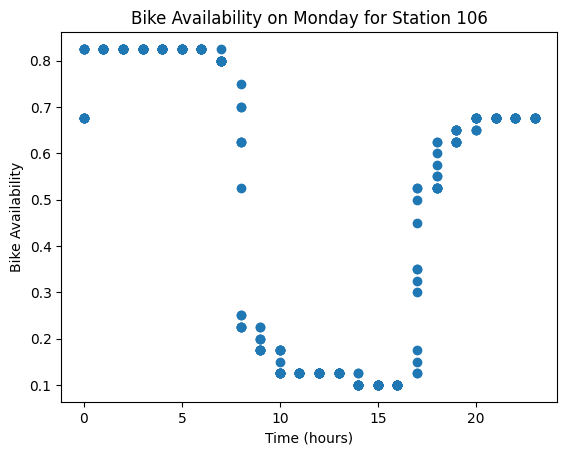

In [141]:
# create scatter plot using the filtered DataFrame
plt.scatter(df_mondays['hour'], df_mondays['availability_percentage'])
plt.title("Bike Availability on Monday for Station 106")
plt.ylabel("Bike Availability")
plt.xlabel("Time (hours)")
plt.show()


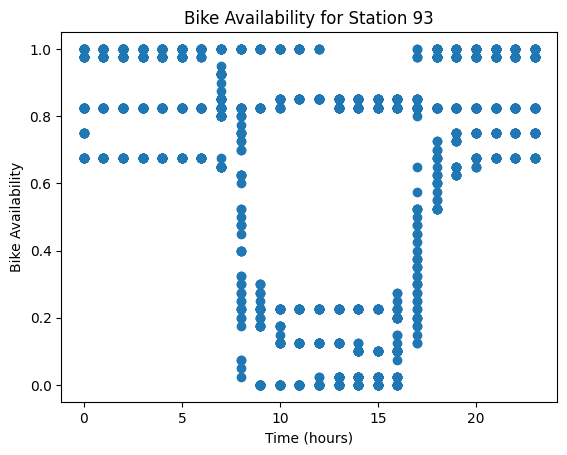

In [142]:
# filter the DataFrame to only include data for one station
df_station = df_main[df_main['number'] == 93]

# create scatter plot using the filtered DataFrame
plt.scatter(df_station['hour'], df_station['availability_percentage'])
plt.title("Bike Availability for Station 93")
plt.ylabel("Bike Availability")
plt.xlabel("Time (hours)")
plt.show()


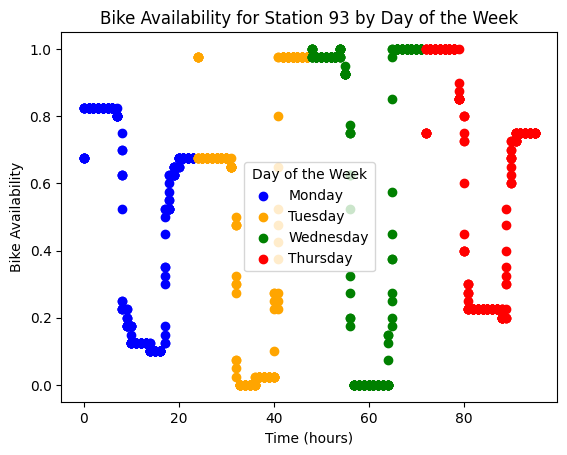

In [161]:
# filter the DataFrame to only include data for one station
df_station = df_main[df_main['number'] == 93]

# create a list of colors to use for each day of the week
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

# create scatter plot for each day of the week using the filtered DataFrame
for i in range(0,4):
    # filter the DataFrame to only include data for the current day of the week
    df_day = df_station[df_station['datetime'].dt.dayofweek == i]

    df_station.loc[df_station['datetime'].dt.dayofweek == i, 'hour']

    # create scatter plot for the current day of the week
    plt.scatter(df_day['hour']+24*i, df_day['availability_percentage'], color=colors[i], label=df_day['datetime'].dt.day_name().unique()[0])

# set plot title, x-axis label, and legend
plt.title("Bike Availability for Station 93 by Day of the Week")
plt.xlabel("Time (hours)")
plt.ylabel("Bike Availability")
plt.legend(title="Day of the Week")

# show the plot
plt.show()


### Conclusion- hours is too granular need more precision?